In [ ]:
#problem statement:- There are more than 550 testing points.
# (1)To reduce the Testing time - work on feature engineering & Dimensionality reduction.
# (2)Required only highly significant testing points.
# (3)Test the model accuracy

In [ ]:
# import basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#reading the csv file
data = pd.read_csv("/content/drive/MyDrive/Ultrasound_1.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,NaN,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,131.2543,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,-1
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,NaN,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,-1
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,128.2819,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,NaN,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1


In [ ]:
print(data["Pass/Fail"].value_counts(normalize=True))
data["Pass/Fail"].value_counts()
#there is high imbalance in data (target column)

-1    0.933418
 1    0.066582
Name: Pass/Fail, dtype: float64


-1    1472
 1     105
Name: Pass/Fail, dtype: int64

In [ ]:
#reading the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Columns: 577 entries, 0 to Pass/Fail
dtypes: float64(576), int64(1)
memory usage: 6.9 MB


In [ ]:
#creating copy of data and finding the percentage of null value columns
df = data.copy()
nullvalues = (df.isnull().mean() * 100).round(2)
pd.set_option("display.max_rows",None)
print(nullvalues)

0             0.32
1             0.44
2             0.89
3             0.89
4             0.89
5             0.89
6             0.89
7             0.57
8             0.13
9             0.13
10            0.13
11            0.13
12            0.13
14            0.19
15            0.19
16            0.19
17            0.19
18            0.19
19            0.63
20            0.00
21            0.13
22            0.13
23            0.13
24            0.13
25            0.13
26            0.13
27            0.13
28            0.13
29            0.13
30            0.13
31            0.13
32            0.06
33            0.06
34            0.06
35            0.06
36            0.06
37            0.06
38            0.06
39            0.06
40            1.52
41            1.52
42            0.06
43            0.06
44            0.06
45            0.06
46            0.06
47            0.06
48            0.06
50            0.06
51            0.06
53            0.25
54            0.25
55          

In [ ]:
#columns having null values >= 40% --dropping them becuase in healthcare domain manipulation of data is not suggested
columns_drop = nullvalues[nullvalues >= 20].index
df.drop(columns = columns_drop , inplace = True)

In [ ]:
#after dropping the highly null values columns checking the total columns left
df.shape

(1577, 545)

In [ ]:
#checking for duplicate columns
duplicated_columns = df.columns[df.columns.duplicated(keep=False)]
print("Duplicated Columns:", duplicated_columns)
#no duplicate columns are present

Duplicated Columns: Index([], dtype='object')


In [ ]:
#dropping the zero variance columns as they serve no purpose
df = df.loc[:, df.var() != 0]
df.shape

(1577, 441)

In [ ]:
#seperating target and features columns
target = df.iloc[:,-1]
features = df.iloc[:,:-1]
print(features.head(2))
print(target.head(2))

         0        1          2          3       4         6       7       8  \
0  2973.86  2359.01  2196.6555  1066.1908  1.2188  101.8900  0.1215  1.4544   
1  3052.82  2525.33  2186.2667  1088.7359  1.2723  103.5633  0.1216  1.4891   

        9      10  ...     576      577     582     583     584     585  \
0 -0.0052 -0.0003  ...  1.5138   5.1798  0.5025  0.0128  0.0040  2.5391   
1 -0.0007 -0.0088  ...  1.7099  12.3326  0.5003  0.0150  0.0043  2.9976   

      586     587     588       589  
0  0.0199  0.0117  0.0043   58.5665  
1  0.0228  0.0299  0.0105  131.2543  

[2 rows x 440 columns]
0    1
1   -1
Name: Pass/Fail, dtype: int64


In [ ]:
#checking the multicorrelation

correlation_ = features.corr()
print(correlation_)

            0         1         2         3         4         6         7  \
0    1.000000 -0.144341 -0.003322  0.005753 -0.011066 -0.008220  0.032730   
1   -0.144341  1.000000  0.004423 -0.003721 -0.001547 -0.028009 -0.011023   
2   -0.003322  0.004423  1.000000  0.300444  0.096092 -0.138970 -0.275052   
3    0.005753 -0.003721  0.300444  1.000000 -0.058178 -0.685091  0.139602   
4   -0.011066 -0.001547  0.096092 -0.058178  1.000000 -0.074444 -0.914619   
6   -0.008220 -0.028009 -0.138970 -0.685091 -0.074444  1.000000  0.024565   
7    0.032730 -0.011023 -0.275052  0.139602 -0.914619  0.024565  1.000000   
8   -0.061084  0.030196  0.023198 -0.105821 -0.026035  0.088623  0.018624   
9    0.011654  0.023207  0.011308  0.073290  0.054924 -0.051676 -0.089625   
10   0.002692  0.010877  0.072523  0.052816 -0.006487 -0.006295 -0.003283   
11   0.046494 -0.021047  0.041594  0.041007 -0.001107 -0.018261 -0.010309   
12  -0.000675  0.034010  0.014551 -0.025752 -0.002289  0.057763 -0.002713   

In [ ]:
#dropping multicorrelated columns greater than 70%

feature_remove = []
for col in correlation_.columns:
  for other_col in correlation_.columns:
    if col != other_col and abs(correlation_.loc[col,other_col]) >= 0.7:
      feature_remove.append(other_col)
features_nocorr = features.drop(feature_remove , axis = 1)

In [ ]:
#finding total columns
features_nocorr.shape

(1577, 100)

In [ ]:
#checking for the remaining null values
features_nocorr.isna().mean() * 100

0       0.317058
1       0.443881
2       0.887762
3       0.887762
6       0.887762
8       0.126823
9       0.126823
10      0.126823
12      0.126823
14      0.190235
15      0.190235
18      0.190235
20      0.000000
23      0.126823
24      0.126823
28      0.126823
31      0.126823
33      0.063412
37      0.063412
38      0.063412
40      1.521877
41      1.521877
44      0.063412
48      0.063412
55      0.253646
56      0.253646
57      0.253646
58      0.253646
59      0.443881
61      0.380469
63      0.443881
68      0.380469
71      0.380469
75      1.521877
76      1.521877
77      1.521877
78      1.521877
79      1.521877
80      1.521877
81      1.521877
82      1.521877
83      0.063412
84      0.760938
86      0.000000
87      0.000000
88      0.000000
90      3.233989
91      0.380469
95      0.380469
100     0.380469
102     0.380469
103     0.126823
107     0.380469
108     0.380469
113     0.000000
115     0.000000
116     0.000000
118     1.521877
120     0.0000

In [ ]:
#imputing the null values with mean
dataf = features_nocorr.fillna(features_nocorr.median())

In [ ]:
#cross checking for null values
dataf.isna().mean() * 100

0      0.0
1      0.0
2      0.0
3      0.0
6      0.0
8      0.0
9      0.0
10     0.0
12     0.0
14     0.0
15     0.0
18     0.0
20     0.0
23     0.0
24     0.0
28     0.0
31     0.0
33     0.0
37     0.0
38     0.0
40     0.0
41     0.0
44     0.0
48     0.0
55     0.0
56     0.0
57     0.0
58     0.0
59     0.0
61     0.0
63     0.0
68     0.0
71     0.0
75     0.0
76     0.0
77     0.0
78     0.0
79     0.0
80     0.0
81     0.0
82     0.0
83     0.0
84     0.0
86     0.0
87     0.0
88     0.0
90     0.0
91     0.0
95     0.0
100    0.0
102    0.0
103    0.0
107    0.0
108    0.0
113    0.0
115    0.0
116    0.0
118    0.0
120    0.0
126    0.0
128    0.0
129    0.0
131    0.0
132    0.0
134    0.0
418    0.0
419    0.0
423    0.0
432    0.0
433    0.0
438    0.0
460    0.0
468    0.0
472    0.0
476    0.0
482    0.0
483    0.0
484    0.0
485    0.0
486    0.0
487    0.0
488    0.0
489    0.0
499    0.0
500    0.0
510    0.0
511    0.0
521    0.0
542    0.0
544    0.0
547    0.0

In [ ]:
#columns left
dataf.shape

(1577, 100)

In [ ]:
#implementing the vif for feature reduction
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data= pd.DataFrame()
vif_data['column'] = dataf.columns
vif_data['VIF'] = [variance_inflation_factor(dataf.values , i)for i in range(dataf.shape[1])]

print(vif_data)

   column            VIF
0       0    1897.403058
1       1    1084.543308
2       2    6771.167484
3       3      25.062599
4       6     566.980810
5       8     467.652717
6       9       1.194786
7      10       1.179096
8      12    7668.588700
9      14      13.260783
10     15     690.245184
11     18    9530.116721
12     20    7732.161050
13     23       9.483454
14     24       1.202127
15     28     762.048993
16     31      81.336723
17     33      55.907641
18     37   65920.839735
19     38   52585.731429
20     40      11.286829
21     41       3.711535
22     44    8130.871167
23     48    2427.558994
24     55   19353.927418
25     56   39640.124955
26     57   61710.902465
27     58    5787.739985
28     59       2.253661
29     61    3122.531884
30     63      11.632624
31     68    2313.989304
32     71      15.530053
33     75       1.452079
34     76       3.042948
35     77       1.308790
36     78       2.408288
37     79       1.706797
38     80       1.557670


In [ ]:
#dropping columns having high vif
high_vif = vif_data[vif_data['VIF'] >220]['column']
print(high_vif.shape)
dataf = dataf.drop(columns = high_vif)
dataf.head(5)

(40,)


,3,9,10,14,23,24,31,33,40,41,...,500,510,511,521,544,558,563,571,586,589
0,1066.1908,-0.0052,-0.0003,9.5221,-3718.50,1500.25,4.7036,8.6667,14.55,4.866,...,0.0000,68.7631,0.000,0.0,0.0026,1.0068,0.6275,2.2935,0.0199,58.5665
1,1088.7359,-0.0007,-0.0088,2.4472,-3972.00,1497.50,4.6613,8.6309,78.31,2.408,...,0.0000,142.6901,320.000,0.0,0.0026,1.0052,0.7711,2.2599,0.0228,131.2543
2,1083.3937,-0.0214,-0.0043,2.9634,-4318.50,-2849.00,3.1987,9.1502,72.29,3.958,...,737.6947,65.1163,0.000,0.0,0.0026,0.9404,0.6889,2.1965,0.0228,131.2543
3,1835.9832,0.0033,0.0018,3.3456,-952.75,1437.00,4.5924,9.1638,74.21,2.963,...,0.0000,98.0306,0.000,0.0,0.0026,0.9705,0.7547,2.3964,0.0140,128.2819
4,1177.0830,-0.0080,0.0038,11.7113,-4438.25,1576.75,4.6423,8.6309,78.31,2.408,...,464.2254,141.0405,455.814,0.0,0.0026,1.0052,0.6608,2.2047,0.0140,128.2819


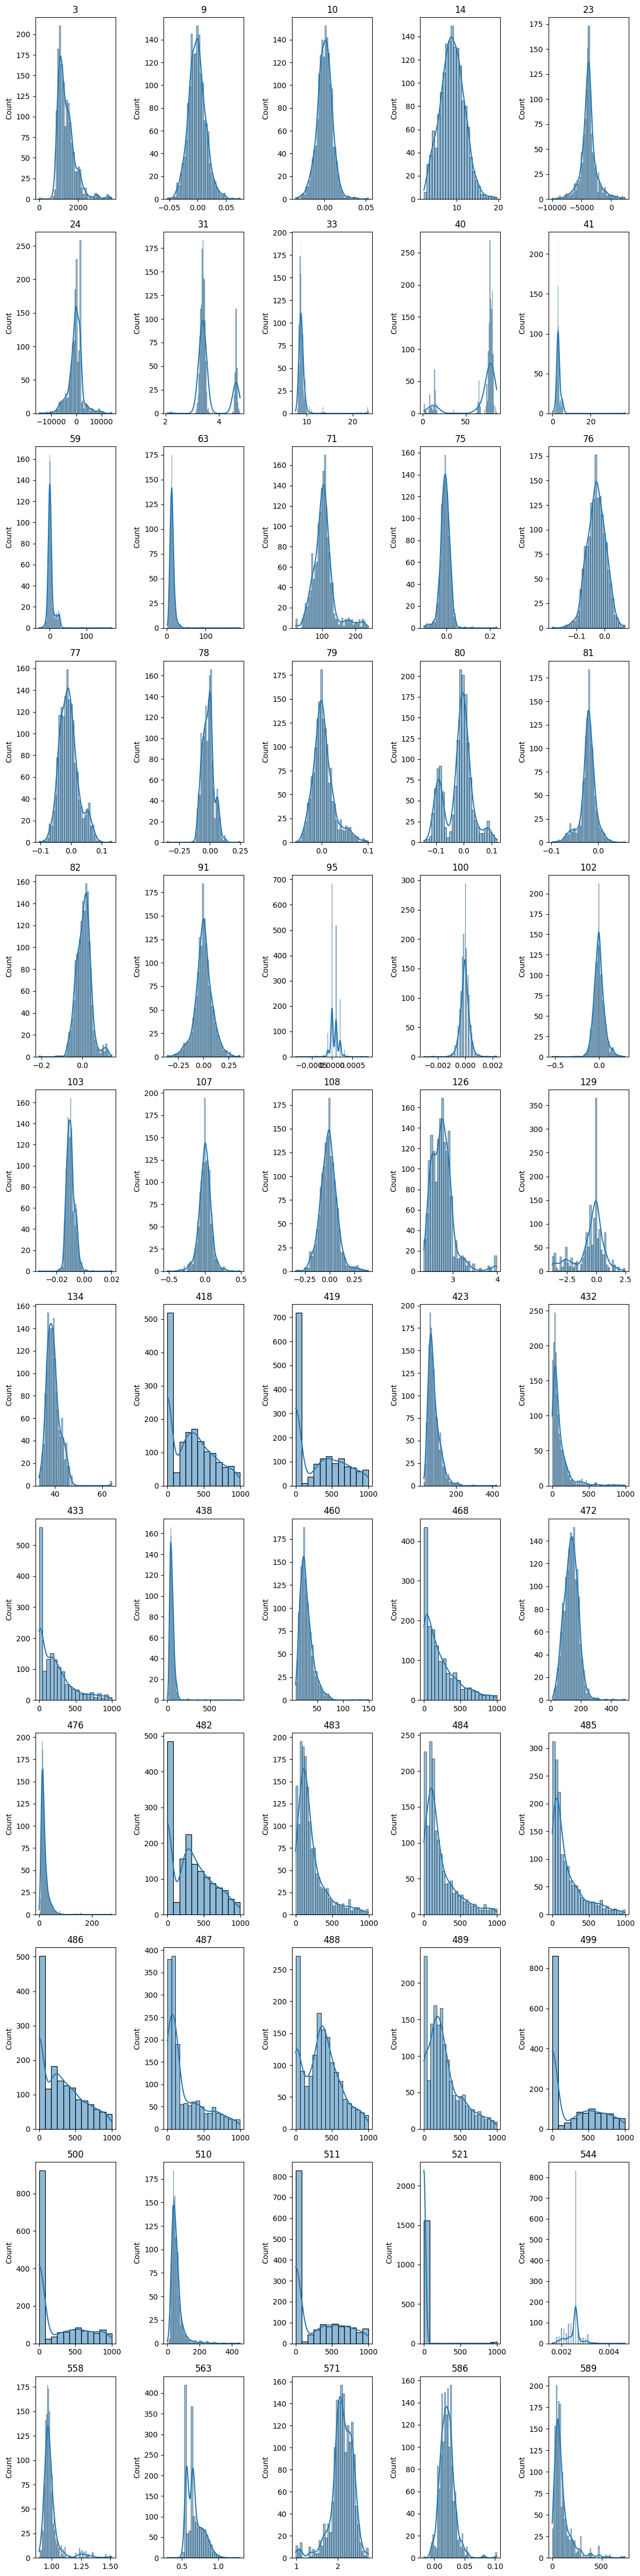

In [ ]:
#Let us Visualize the columns and analyze the distributions
num_cols = 5
num_rows = 12

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a histogram
for i, column in enumerate(dataf.columns):
    ax = axes[i]
    sns.histplot(dataf[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

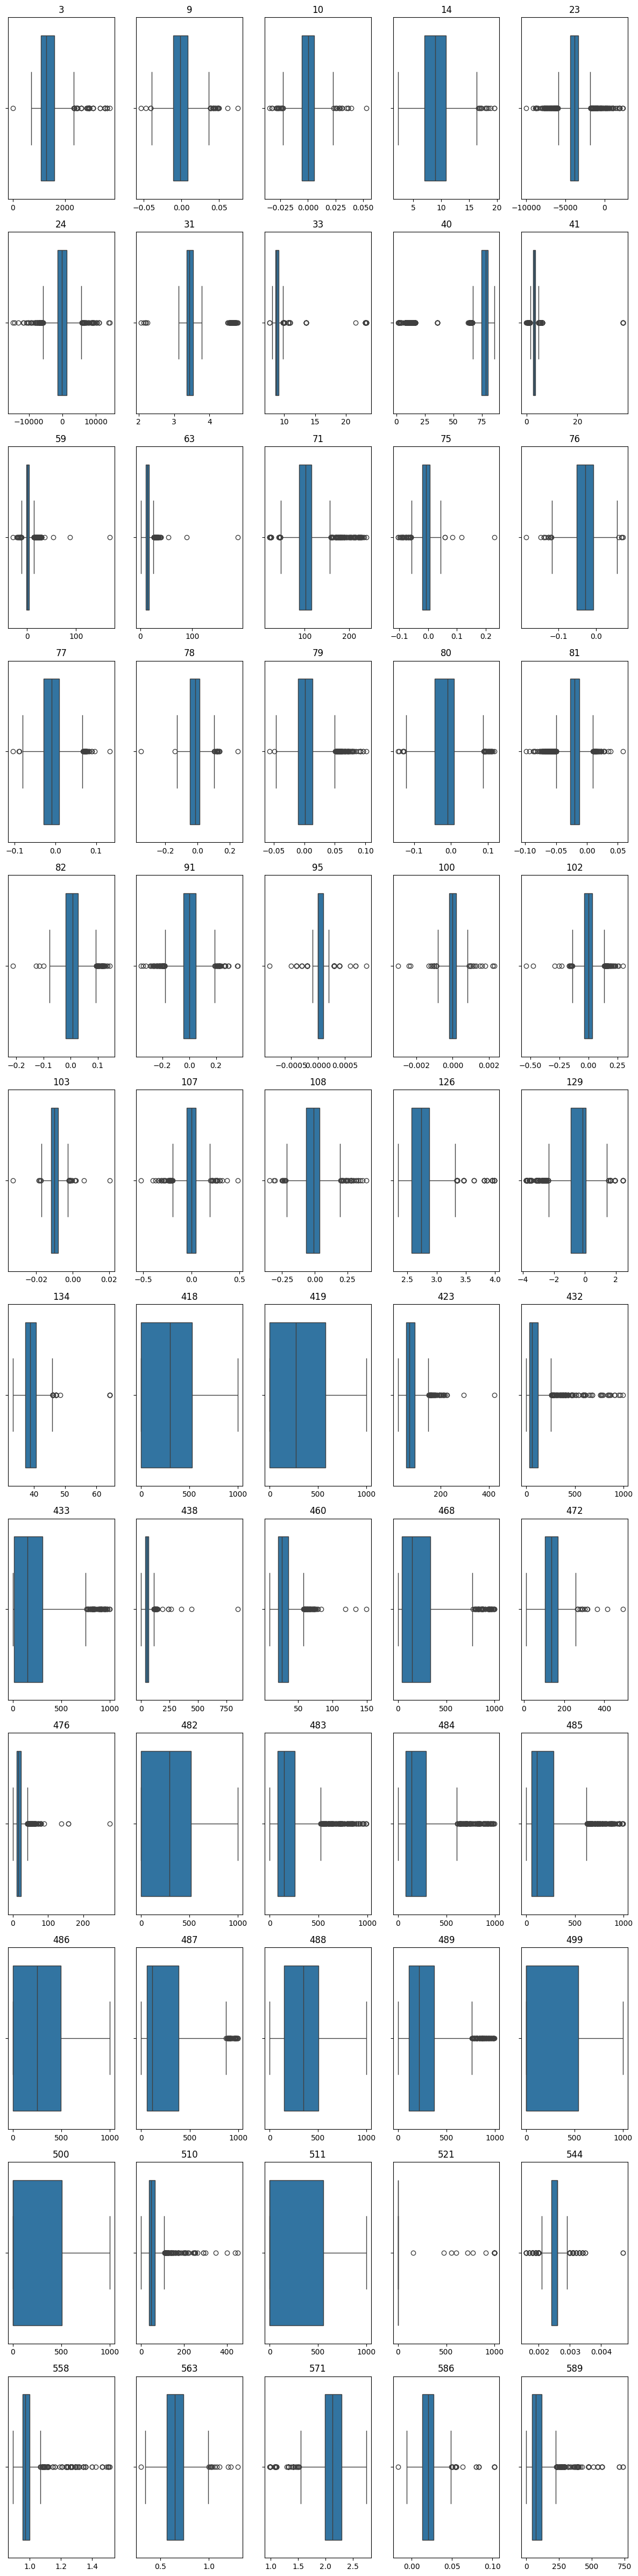

In [ ]:
fig, axes = plt.subplots(12, 5, figsize=(12, 4 * 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a box plot
for i, column in enumerate(dataf.columns):
    ax = axes[i]
    sns.boxplot(x=dataf[column], ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
#spliting the data
from sklearn.model_selection import train_test_split
x= dataf
y= target
x_train,x_test,y_train,y_test = train_test_split(x,y ,train_size= 0.7,random_state = 42)

In [ ]:
#value counting of the target column
data["Pass/Fail"].value_counts()

-1    1472
 1     105
Name: Pass/Fail, dtype: int64

In [ ]:
#fixing imblanced data set with smotetomek
pass_ = data[data["Pass/Fail"]==1]
fail  = data [data["Pass/Fail"]== -1]

print('previous shape ',fail.shape,pass_.shape)

from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state = 42)
x_res,y_res = smk.fit_resample(x_train,y_train)
print('new shap ',x_res.shape,y_res.shape)

previous shape  (1472, 577) (105, 577)
new shap  (2044, 60) (2044,)


In [ ]:
#showing and analysing the summery of features
dataf.describe()

,3,9,10,14,23,24,31,33,40,41,...,500,510,511,521,544,558,563,571,586,589
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.00000,1577.000000,1577.000000,1577.000000,1577.000000,...,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.00000,1577.000000,1577.000000,1577.000000,1577.000000
mean,1393.870125,-0.000962,0.000151,8.972856,-3807.240911,-302.12640,3.675189,8.959256,68.032920,3.350123,...,239.525701,55.794296,277.128652,11.536458,0.002510,0.99445,0.675233,2.103071,0.021380,99.824653
std,439.307063,0.015092,0.009287,2.832713,1379.483095,2900.21777,0.537218,1.340174,23.959922,2.336038,...,322.381887,37.631604,330.313732,102.799442,0.000294,0.08277,0.110548,0.274905,0.012313,93.718244
min,0.000000,-0.053400,-0.034900,2.249300,-9986.750000,-14804.50000,2.069800,7.603200,1.434000,-0.075900,...,0.000000,0.000000,0.000000,0.000000,0.001600,0.89190,0.304900,0.980200,-0.016900,0.000000
25%,1083.393700,-0.010800,-0.005500,7.042700,-4373.250000,-1476.00000,3.362100,8.580000,74.800000,2.694000,...,0.000000,35.350600,0.000000,0.000000,0.002400,0.95520,0.567100,1.983300,0.013400,44.368600
50%,1283.436800,-0.001400,0.000400,8.929400,-3819.000000,-85.75000,3.430700,8.770000,78.300000,3.074000,...,0.000000,47.120400,0.000000,0.000000,0.002600,0.97250,0.653500,2.120600,0.020500,71.778000
75%,1588.509000,0.008200,0.005900,10.852500,-3352.750000,1378.25000,3.538400,9.062200,80.180000,3.521000,...,504.525500,64.436200,555.932200,0.000000,0.002600,1.00080,0.737600,2.290900,0.027500,116.108800
max,3715.041700,0.074900,0.053000,19.546500,2363.000000,14106.00000,4.804400,23.345300,86.120000,37.880000,...,999.233700,451.485100,1000.000000,1000.000000,0.004700,1.51210,1.298800,2.739500,0.102800,737.304800


In [ ]:
# features and not scaled
# Using Standard scaler to standardize the data as data is nearly Normaly distributed
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled_x_train=scaler.fit_transform(x_res)
scaled_x_test=scaler.transform(x_test)

pd.DataFrame(scaled_x_train, columns=x.columns)



,3,9,10,14,23,24,31,33,40,41,...,500,510,511,521,544,558,563,571,586,589
0,1.139814,0.051623,1.481419,-1.515728,2.175985,-0.529877,-0.450784,-0.182879,0.523690,0.167590,...,-0.760326,-0.714661,-0.997569,-0.167929,0.360436,-0.215041,-0.588945,-1.968304,-0.518471,0.882966
1,1.379841,0.363478,0.175373,0.266506,0.849120,1.265963,-0.619531,-0.652978,0.678920,-0.332170,...,-0.760326,-0.800112,-0.997569,-0.167929,-0.418552,-0.650588,1.217320,0.859208,3.174280,-0.801880
2,-0.750260,-1.110036,-0.014597,0.601159,0.209518,0.322054,-0.311212,-0.369441,0.507012,-0.703904,...,1.805738,0.553967,-0.223458,-0.167929,0.360436,-0.328333,0.176421,1.000298,0.427913,-0.313860
3,0.192013,-1.063258,1.896979,0.592605,-0.964354,-0.538641,-0.669273,0.387824,-0.005290,-0.155300,...,0.082795,-1.071307,-0.997569,-0.167929,0.360436,-0.491978,-0.186581,0.819138,0.594921,-0.872902
4,-0.155130,0.308903,-0.418284,-0.634664,0.267748,-0.237921,-0.473662,-0.242515,-2.441119,0.624674,...,-0.760326,-0.052915,-0.436941,-0.167929,-0.808045,0.347646,-1.131262,-0.208222,-0.286514,-0.662320
5,-0.432720,1.221078,1.208337,-0.906074,-0.102402,-0.868356,-0.306594,0.063122,0.471091,-0.462251,...,-0.500116,-0.362426,-0.997569,-0.167929,-0.418552,0.082038,1.980499,0.859208,-0.370018,-0.143888
6,-0.163637,-0.642254,-1.700584,0.709130,-0.315850,-0.810807,-0.483107,-0.099823,0.535236,-0.797480,...,-0.760326,-0.403543,0.808691,-0.167929,0.360436,-0.534777,-0.558331,1.008379,0.418634,0.017651
7,-0.671835,0.207550,-1.771823,-0.007088,2.049696,0.303866,-0.456661,0.196842,-0.001014,0.328520,...,-0.760326,0.066593,2.040623,-0.167929,0.360436,-0.444143,-0.186581,0.692191,0.409356,-0.961978
8,4.167229,-0.026341,0.092261,1.595711,-1.576510,-0.549479,-0.530121,-0.095931,0.565598,-0.299778,...,-0.760326,-0.659980,0.688972,-0.167929,3.476384,1.113001,-1.131262,-0.619705,0.270182,-0.668825
9,-0.030538,-0.127694,0.222866,0.586570,0.058750,0.364274,-3.132260,0.030401,0.527966,-0.295150,...,-0.760326,-0.244447,-0.997569,-0.167929,-0.029058,0.448351,2.303047,0.647069,-0.880323,0.261621


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

#Training
LR.fit(scaled_x_train,y_res)

#Prediction
y_pred = LR.predict(scaled_x_test)


In [ ]:
#accuracy score and confusion matrix
from sklearn.metrics import accuracy_score , classification_report
score = accuracy_score(y_test,y_pred)
print(score)
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,y_pred)
print(cnf_matrix)

0.7721518987341772
[[358  91]
 [ 17   8]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.95      0.80      0.87       449
           1       0.08      0.32      0.13        25

    accuracy                           0.77       474
   macro avg       0.52      0.56      0.50       474
weighted avg       0.91      0.77      0.83       474



In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
y_pred_score = LR.predict_proba(scaled_x_test)[:,1]

fpr, tpr, _  = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr,tpr)

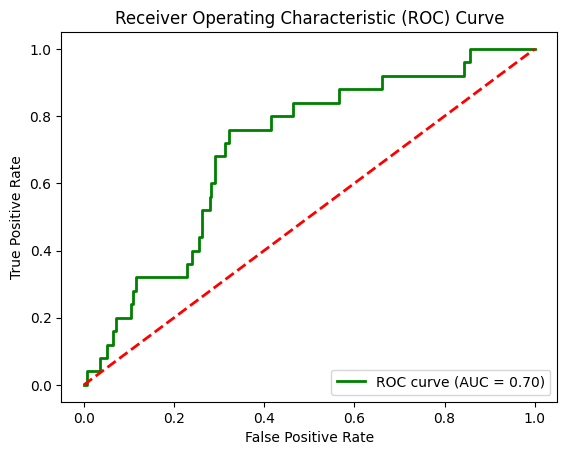

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(scaled_x_train,y_res)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(scaled_x_test)


In [ ]:
accuracy = accuracy_score(y_test,y_pred_dt)
accuracy

0.869198312236287

In [ ]:
print(confusion_matrix(y_test,y_pred_dt))

[[405  44]
 [ 18   7]]


In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

          -1       0.96      0.90      0.93       449
           1       0.14      0.28      0.18        25

    accuracy                           0.87       474
   macro avg       0.55      0.59      0.56       474
weighted avg       0.91      0.87      0.89       474



#parameter tunning of Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],
              'max_depth':[None,5,2,10],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,3,5]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(dt_clf,param_grid,cv =5)

In [ ]:
grid_search.fit(scaled_x_train,y_res)

grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [ ]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
y_dt_pred = best_model.predict(scaled_x_test)
print(classification_report (y_test,y_dt_pred))

              precision    recall  f1-score   support

          -1       0.95      0.89      0.92       449
           1       0.09      0.20      0.12        25

    accuracy                           0.85       474
   macro avg       0.52      0.54      0.52       474
weighted avg       0.91      0.85      0.88       474



#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(scaled_x_train,y_res)

SVC(kernel='linear')

In [ ]:
y_prediction =clf.predict(scaled_x_test)
accuracy = accuracy_score(y_test,y_prediction)
print(accuracy)
print(confusion_matrix(y_test,y_prediction))

0.7510548523206751
[[344 105]
 [ 13  12]]


In [ ]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

          -1       0.96      0.77      0.85       449
           1       0.10      0.48      0.17        25

    accuracy                           0.75       474
   macro avg       0.53      0.62      0.51       474
weighted avg       0.92      0.75      0.82       474



#model selection

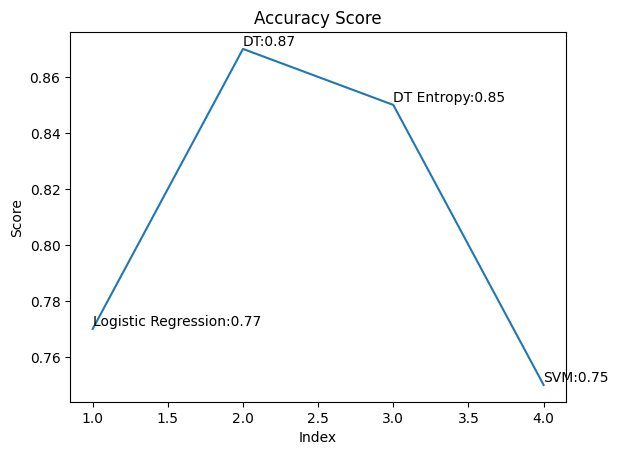

In [ ]:
x = range(1, 5)  # Assuming x-axis values are 1, 2, 3, 4
y = [0.77, 0.87, 0.85, 0.75]
label = ['Logistic Regression', 'DT', "DT Entropy", 'SVM']

# Plot
plt.plot(x, y)
plt.xlabel('Index')
plt.ylabel('Score')

for i, j, label in zip (x,y,label):
  plt.text(i,j,f'{label}:{j}',ha = 'left', va = 'bottom')
plt.title('Accuracy Score')
plt.show()
